In [1]:
import pandas as pd
from pyprojroot import here

In [2]:
housing = pd.read_csv(here("data/housing_renamed.csv"))

In [3]:
housing.head()

,neighborhood,type,units,year_built,sq_ft,income,income_per_sq_ft,expense,expense_per_sq_ft,net_income,value,value_per_sq_ft,boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
housing.columns

Index(['neighborhood', 'type', 'units', 'year_built', 'sq_ft', 'income',
       'income_per_sq_ft', 'expense', 'expense_per_sq_ft', 'net_income',
       'value', 'value_per_sq_ft', 'boro'],
      dtype='object')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
   pd.get_dummies(housing[["units", "sq_ft", "boro"]]),
    housing["value_per_sq_ft"],
    test_size=0.20,
    random_state=42
)

In [7]:
lr = LinearRegression().fit(X_train, y_train)

In [8]:
lr.score(X_train, y_train)

0.597123868933847

In [9]:
lr.score(X_test, y_test)

0.613712528503087

In [10]:
from patsy import dmatrices

In [11]:
y, X = dmatrices("value_per_sq_ft ~ units + sq_ft + boro", housing, return_type="dataframe")
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=42
)
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.6137125285026594

In [12]:
import matplotlib.pyplot as plt

In [13]:
predictions = lr.predict(X_test)

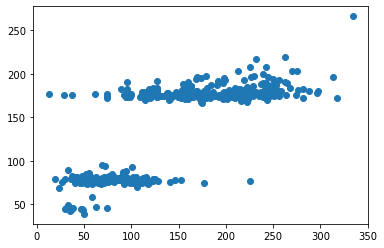

In [14]:
plt.scatter(y_test, predictions)

In [15]:
import seaborn as sns

In [16]:
y_test.shape

(526, 1)

In [17]:
test_prediction_df = pd.concat([y_test.reset_index(drop=True),
                                X_test.reset_index(drop=True),
                                pd.DataFrame(predictions)],
                               axis=1)
test_prediction_df.sample(10)

,value_per_sq_ft,Intercept,boro[T.Brooklyn],boro[T.Manhattan],boro[T.Queens],boro[T.Staten Island],units,sq_ft,0
439,96.75,1.0,1.0,0.0,0.0,0.0,11.0,8620.0,77.809605
219,197.79,1.0,0.0,1.0,0.0,0.0,19.0,43682.0,179.106117
13,95.20,1.0,0.0,1.0,0.0,0.0,52.0,70212.0,178.673099
125,51.31,1.0,1.0,0.0,0.0,0.0,15.0,11050.0,77.613631
213,210.99,1.0,0.0,1.0,0.0,0.0,79.0,97500.0,179.338072
36,205.98,1.0,0.0,1.0,0.0,0.0,28.0,17793.0,172.939180
226,127.58,1.0,0.0,1.0,0.0,0.0,14.0,6846.0,173.179156
123,248.91,1.0,0.0,1.0,0.0,0.0,170.0,223560.0,187.804315
142,223.34,1.0,0.0,1.0,0.0,0.0,174.0,134519.0,170.904864
192,87.94,1.0,1.0,0.0,0.0,0.0,12.0,13669.0,78.571672


In [18]:
def recode_boro(df):
    # There is also a DataFrame.replace method
    # that is used to recode values
    if df["boro[T.Brooklyn]"] == 1:
        return "brooklyn"
    elif df["boro[T.Manhattan]"] == 1:
        return "manhattan"
    elif df["boro[T.Queens]"] == 1:
        return "queens"
    elif df["boro[T.Staten Island]"] == 1:
        return "staten"
    else:
        return "bronx"

In [19]:
test_prediction_df['boro'] = test_prediction_df.filter(like="boro").apply(recode_boro, axis=1)

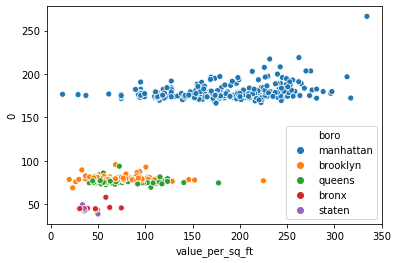

In [20]:
sns.scatterplot(x='value_per_sq_ft', y=0, data=test_prediction_df, hue="boro")

# Cross validation

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

LinearRegression.score: Returns the coefficient of determination R^2 of the prediction.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [22]:
X_train.shape

(2100, 7)

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(LinearRegression(), X_train, y_train, cv=5)

array([0.54069099, 0.62189729, 0.60905418, 0.60935215, 0.57127602])

In [24]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.54069099, 0.62189729, 0.60905418, 0.60935215, 0.57127602])

In [25]:
from sklearn.model_selection import KFold

cross_val_score(LinearRegression(), X_train, y_train,
                cv=KFold(n_splits=10, shuffle=True, random_state=42))

array([0.57072577, 0.62367929, 0.55178697, 0.61756706, 0.58261355,
       0.56433417, 0.59620666, 0.60108946, 0.5613949 , 0.62127622])

If you are doing classification tasks:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
cross_val_score(KNeighborsClassifier(),
                X_train,
                pd.qcut(y_train.value_per_sq_ft, 2, labels=False),
                cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42))

array([0.62857143, 0.6047619 , 0.58095238, 0.63809524, 0.61428571,
       0.68571429, 0.55238095, 0.5952381 , 0.60952381, 0.6047619 ,
       0.57142857, 0.6047619 , 0.58095238, 0.57619048, 0.66666667,
       0.62857143, 0.58095238, 0.61428571, 0.67142857, 0.57619048,
       0.55238095, 0.64761905, 0.64285714, 0.56666667, 0.56190476,
       0.6       , 0.5952381 , 0.6047619 , 0.64285714, 0.66190476,
       0.54761905, 0.65714286, 0.56190476, 0.5952381 , 0.6047619 ,
       0.62380952, 0.67619048, 0.6047619 , 0.63333333, 0.66190476,
       0.61428571, 0.5952381 , 0.67142857, 0.6047619 , 0.64285714,
       0.61428571, 0.6       , 0.66666667, 0.55714286, 0.60952381,
       0.61428571, 0.59047619, 0.60952381, 0.62857143, 0.57619048,
       0.63333333, 0.68095238, 0.6       , 0.63809524, 0.60952381,
       0.64761905, 0.64761905, 0.64761905, 0.62857143, 0.5952381 ,
       0.58095238, 0.61904762, 0.62857143, 0.5952381 , 0.59047619,
       0.61904762, 0.62380952, 0.65714286, 0.62380952, 0.64285

In [27]:
from sklearn.model_selection import cross_val_predict
cv_predictions = cross_val_predict(lr, X_train, y_train, cv=5)

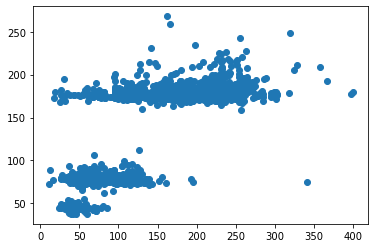

In [28]:
plt.scatter(y_train, cv_predictions)